In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
def generateData(n):
    # Generates a 2D linearly separable dataset with 2n samples.
    # Red and blue clusters in top left and bottom right quadrant
    xb = (np.random.rand(n) * 2 - 1) / 2 - 0.5
    yb = (np.random.rand(n) * 2 - 1) / 2 + 0.5
    xr = (np.random.rand(n) * 2 - 1) / 2 + 0.5
    yr = (np.random.rand(n) * 2 - 1) / 2 - 0.5
    XB = np.stack([xb, yb], axis=1)
    XR = np.stack([xr, yr], axis=1)
    X = np.concatenate([XB, XR])
    y = np.concatenate([np.zeros(n, dtype=np.int32), np.ones(n, dtype=np.int32)])
    return X, y

For the perceptron algorithm, I used the book: *Murphy, Kevin; Probabilistic Machine Learning, cap 10*

In [4]:
class myPerceptron():
  def __init__(self, learning_rate = 0.01, n_iter=20000):
    self.n_iter = n_iter
    self.weights = None
    self.learning_rate = learning_rate

  def sigmoid(self, x):
    a = 0
    #print(self.weights)
    #print(x)
    for i in range(len(x)):
      a += self.weights[i]*x[i]
    return 1/(1 + np.exp(-a))


  #page 346, equation: 10.30, we have
  def prediction(self, X):
    y_pred = []
    for i in X:
      val = self.sigmoid(i)
      if val >= 0.5:
        y_pred.append(1)
      else:
        y_pred.append(0)
    return y_pred



  def fit(self, X, y):
    #print(X)
    X = np.c_[np.ones((X.shape[0], 1)), X] #for intercepto
    self.weights = np.zeros(X.shape[1]) #Here we have the intercepto
    #we update the weights like => weight = weight + p(gradient), where p is the learning rate
    for _ in range(self.n_iter):
      prediction = self.prediction(X)
      self.weights += self.learning_rate * (y - prediction).dot(X)



  def predict(self, X):
    y_pred = []
    for i in X:
      val = self.sigmoid(i)
      if val >= 0.5:
        y_pred.append(1)
      else:
        y_pred.append(0)
    return y_pred

Let's test my Perceptron algorithm

(20, 2)
(20,)
[-0.01        0.12307562 -0.08414871]


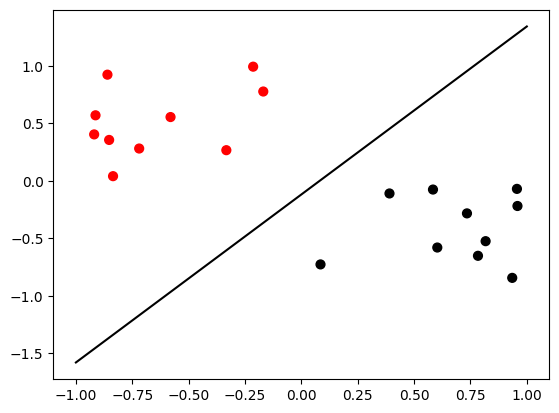

In [5]:
#from code below
def plot_dboundary(weights, offset):
    w1 = weights[0]
    w2 = weights[1]
    b = offset
    slope = -w1 / w2
    intercept = -b / w2
    xx = np.linspace(-1, 1, 10)
    yy = xx * slope + intercept
    plt.figure()
    colormap = np.array(["r", "k"])
    plt.scatter(X[:, 0], X[:, 1], c=colormap[y], s=40)
    plt.plot(xx, yy, "k-")

X, y = generateData(10)

print(X.shape)
print(y.shape)

my_perceptron = myPerceptron()
my_perceptron.fit(X, y)

weights = my_perceptron.weights
print(weights)

plot_dboundary(weights[1:], weights[0])


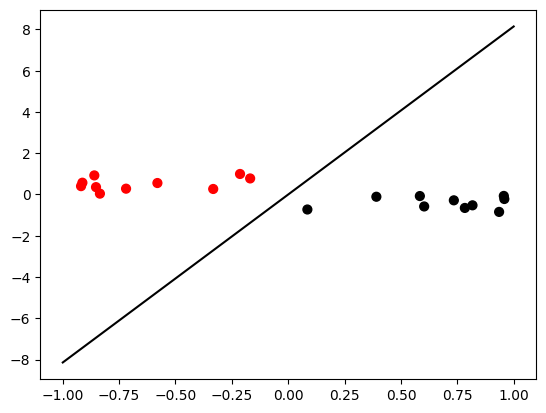

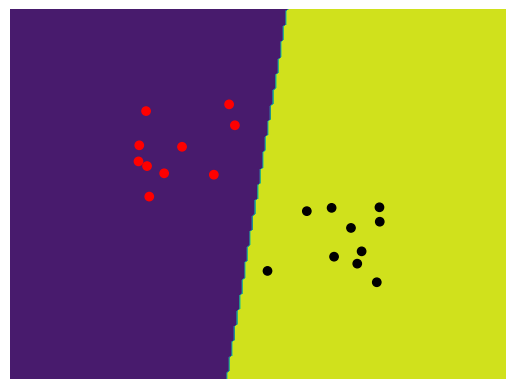

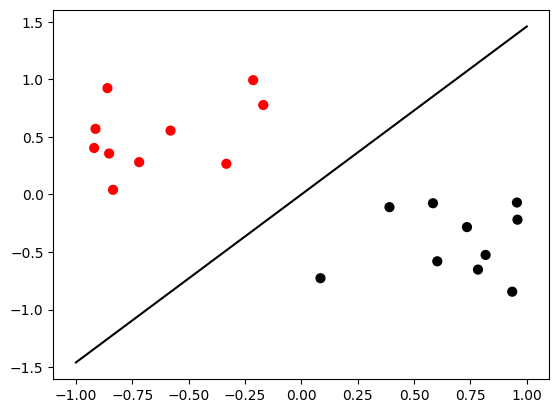

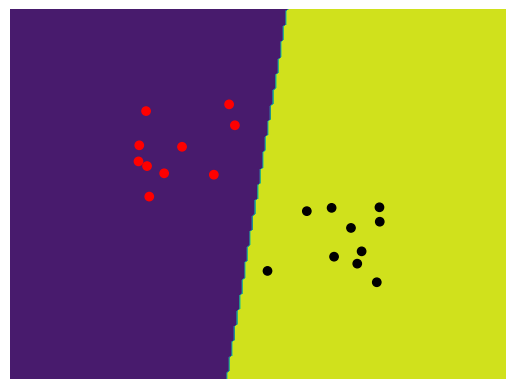

In [6]:
# Demo of perceptron algorithm in 2d
# Code is modified from various sources, including
# https://medium.com/@thomascountz/19-line-line-by-line-python-perceptron-b6f113b161f3
# http://stamfordresearch.com/scikit-learn-perceptron/
# https://glowingpython.blogspot.com/2011/10/perceptron.html
# https://stackoverflow.com/questions/31292393/how-do-you-draw-a-line-using-the-weight-vector-in-a-linear-perceptron?rq=1
# https://medium.com/@thomascountz/calculate-the-decision-boundary-of-a-single-perceptron-visualizing-linear-separability-c4d77099ef38


import numpy as np
import matplotlib.pyplot as plt

figdir = "../figures"


def save_fig(fname):
    if figdir:
        plt.savefig(os.path.join(figdir, fname))


#np.random.seed(0)


class Perceptron(object):
    def __init__(self, no_of_inputs, max_iter=10, learning_rate=1):
        self.max_iter = max_iter
        self.learning_rate = learning_rate
        self.weights = np.zeros(no_of_inputs + 1)
        self.weights_hist = []

    def predict_single(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        if summation > 0:
            output = 1
        else:
            output = 0
        return output

    def predict(self, X):
        n = X.shape[0]
        yhat = np.zeros(n)
        for i in range(n):
            yhat[i] = self.predict_single(X[i, :])
        return yhat

    def fit(self, training_inputs, labels):
        for epoch in range(self.max_iter):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict_single(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)
                self.weights_hist.append(np.copy(self.weights))


def generateData(n):
    # Generates a 2D linearly separable dataset with 2n samples.
    # Red and blue clusters in top left and bottom right quadrant
    xb = (np.random.rand(n) * 2 - 1) / 2 - 0.5
    yb = (np.random.rand(n) * 2 - 1) / 2 + 0.5
    xr = (np.random.rand(n) * 2 - 1) / 2 + 0.5
    yr = (np.random.rand(n) * 2 - 1) / 2 - 0.5
    XB = np.stack([xb, yb], axis=1)
    XR = np.stack([xr, yr], axis=1)
    X = np.concatenate([XB, XR])
    y = np.concatenate([np.zeros(n, dtype=np.int32), np.ones(n, dtype=np.int32)])
    return X, y


#X, y = generateData(10)


def plot_dboundary_contourf(net):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    fig, ax = plt.subplots()
    Z = net.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z)  # , cmap=plt.cm.Paired)
    ax.axis("off")
    colormap = np.array(["r", "k"])
    ax.scatter(X[:, 0], X[:, 1], c=colormap[y])
    # ax.axis('square')


def plot_dboundary(weights, offset):
    w1 = weights[0]
    w2 = weights[1]
    b = offset
    slope = -w1 / w2
    intercept = -b / w2
    xx = np.linspace(-1, 1, 10)
    yy = xx * slope + intercept
    plt.figure()
    colormap = np.array(["r", "k"])
    plt.scatter(X[:, 0], X[:, 1], c=colormap[y], s=40)
    plt.plot(xx, yy, "k-")


ninputs = 2
net = Perceptron(ninputs)
net.fit(X, y)

w = net.weights[1:]
b = net.weights[0]
plot_dboundary(w, b)
plot_dboundary_contourf(net)

"""
H = net.weights_hist
niter = len(H)
snapshots = [int(t) for t in np.linspace(0, 20, 5)]
#snapshots = [15,  20, 25]
for t in snapshots:
    w = H[t][1:]
    b = H[t][0]
    plot_dboundary(w, b)
    plt.title('iter {}'.format(t))
"""

# sklearn version
from sklearn.linear_model import Perceptron

net_sklearn = Perceptron()
net_sklearn.fit(X, y)
w = net_sklearn.coef_[0]
offset = net_sklearn.intercept_[0]

plot_dboundary(w, b)
plot_dboundary_contourf(net)

##Testing my Logistic regression with many features

In [32]:
"""
Algorithm taked from Elements of Statistical Learning, 2ed. page: 120
"""

def newton_method(X, y, Hessian, Gradient, beta_old, tol=1e-5):
    beta_old = beta_old#.reshape(-1, 1)
    for _ in range(100):
        hessian = Hessian(X, y, beta_old)
        gradient = Gradient(X, y, beta_old)#.reshape(-1, 1)
        #print(hessian.shape)
        #print(gradient.shape)
        step = np.dot(np.linalg.pinv(hessian), gradient)
        beta_new = beta_old - step
        if np.linalg.norm(beta_new - beta_old) < tol:
            break
        beta_old = beta_new
    return beta_new.flatten()


class mylogreg:
  def __init__(self):
    self.beta = 0

  def sigmoid(self,x, beta):
    #print(x)
    a = 0
    #print(x)
    #print(beta)
    for i in range(len(x)):
      a += beta[i]*x[i]
    return 1/(1 + np.exp(-a))


  def grad_log_K2(self,X, y, beta):
    N = len(X)
    sum = 0
    for i in range(N):
      sum += np.dot(X[i], (y[i] - self.sigmoid(X[i], beta)))
    return sum

  def hessian_log_K2(self,X, y, beta):
    N = len(X)
    sum = 0
    #print(X)
    #print(X.shape)
    for i in range(N):
      temp = np.dot(X[i][:, np.newaxis], X[i][np.newaxis, :])
      #print(X[i].T)
      #print(X[i])
      temp *= self.sigmoid(X[i],beta)*(1 - self.sigmoid(X[i],beta))
      sum += temp
    return -1*sum

  #cannot have L1 regularization

  def fit(self, X, y):
    #print(X)
    X = np.c_[np.ones((X.shape[0], 1)), X] #for intercepto
    #print(X.shape)
    beta = [0]*(X.shape[1])

    #print(beta)

    self.beta = newton_method(X, y, self.hessian_log_K2, self.grad_log_K2, beta)
    #print(self.beta)
  def predict_proba(self,X, y):
    X = np.c_[np.ones((X.shape[0], 1)), X]
    probas = []
    for i in range(len(X)):
      proba = 0
      temp = np.dot(y[i], self.beta.T)
      temp = np.dot(temp, X[i])
      val = self.sigmoid(X[i], self.beta)
      log = np.log(val)
      proba += temp - log
      probas.append(proba)
    return probas

  def predict(self,X):
    X = np.c_[np.ones((X.shape[0], 1)), X]
    #print(X)
    #print(self.beta)
    #print(a)
    arr = []
    for j in range(len(X)):
      val = self.sigmoid(X[j], self.beta)
      if val > 0.5:
        arr.append(1)
      else:
        arr.append(0)
    return arr

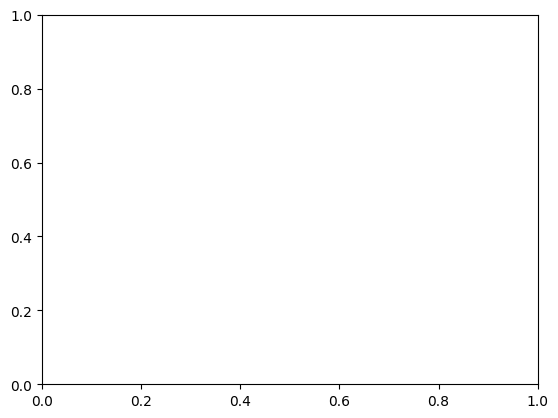

In [33]:
import jax
import jax.numpy as jnp
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn import datasets
from sklearn.metrics import zero_one_loss
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from ipywidgets import interact, FloatSlider, fixed


iris = datasets.load_iris()

#from https://github.com/probml/pyprobml/blob/master/notebooks/book1/02/iris_logreg.ipynb
# petal length, petal width
#print(iris)
train_x = iris["data"]

# 1 if Iris-Virginica, else 0
train_y = (iris["target"] == 2).astype(jnp.int32)
#print(train_x)
#print(train_y)
#fig, ax = plt.subplots(1, 1)
#ax.plot(train_x[train_y == 0, 0], train_x[train_y == 0, 1], "bs", markersize=1.5)
#ax.plot(train_x[train_y == 1, 0], train_x[train_y == 1, 1], "g^", markersize=1.5)



from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


lr = mylogreg()

test_size = np.linspace(0.01, 0.8, 20)
precision = []
for i in range(len(test_size)):
  precision.append([])
for x in range(100):
  for i in range(len(test_size)):
    X_train, X_test, y_train, y_test = train_test_split(
      train_x, train_y, test_size=test_size[i], random_state=0)
    X_train = X_train/np.linalg.norm(X_train)
    X_test = X_test/np.linalg.norm(X_test)
    y_train = y_train/np.linalg.norm(y_train)
    y_test = y_test/np.linalg.norm(y_test)
    #print(X_train)
    #print(X_test)


    lr = mylogreg()
    lr.fit(X_train, y_train)

    y_predict = lr.predict(X_test)

    getit = 0
    for j in range(len(y_predict)):
      if y_predict[j] == y_test[j]:
        getit += 1
    precision[i].append(getit/len(y_test))

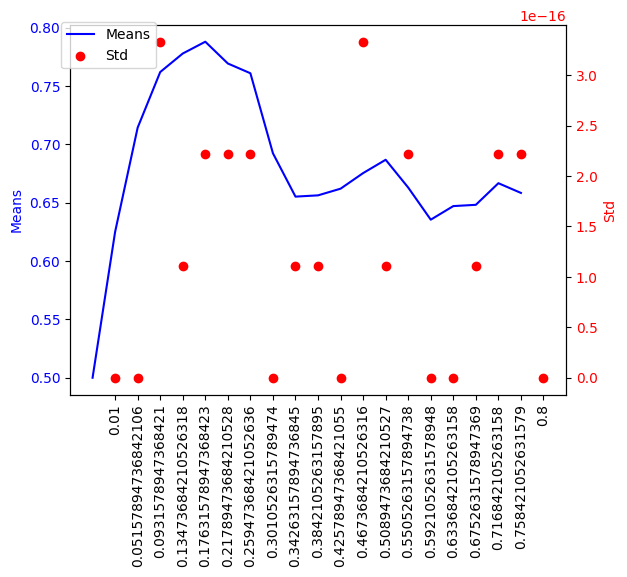

In [34]:
means = np.mean(precision, axis=1)
stds = np.std(precision, axis=1)

fig, ax1 = plt.subplots()
ax1.plot(means, 'b-', label="Means")
ax1.set_ylabel("Means", color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticks((range(1, len(stds) + 1)), test_size, rotation=90)


ax2 = ax1.twinx()

# Scatter plot (eixo direito)
ax2.scatter(x=(range(1, len(stds) + 1)), y=stds, color='r', marker='o', label="Std")
ax2.set_ylabel("Std", color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Adicionando legendas
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

plt.show()